## Prerequisites

In [1]:
random_state = 42
random_state

42

## Otto Group Product Classification Challenge

이번 과제는 세계 최대의 전자상거래 회사 중 하나인 [Otto Group](https://www.ottogroup.com/)에서 주최하는 [Otto Group Product Classification Challenge](https://www.kaggle.com/c/otto-group-product-classification-challenge/) 경진대회에 참석해보겠습니다.

Otto Group은 익명화(anonymization)된 상품 정보에 대한 데이터를 제공하는데, 경진대회 참석자는 이 데이터를 활용하여 주어진 상품 카테고리(target)를 예측해야 합니다. 상품 카테고리는 Class_1부터 Class_9까지 총 9개가 있습니다. 주어진 데이터를 Decision Tree, Random Forest, 그리고 Gradient Boosting Machine를 활용하여 예측해보도록 하겠습니다.




In [2]:
import pandas as pd

data = pd.read_csv("data/train.csv", index_col="id")

print(data.shape)
data.head()

(61878, 94)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


## Preprocessing

In [3]:
label_name = "target"
label_name

'target'

In [4]:
feature_names = data.columns.difference([label_name])

print(len(feature_names))
feature_names

93


Index(['feat_1', 'feat_10', 'feat_11', 'feat_12', 'feat_13', 'feat_14',
       'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19', 'feat_2',
       'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25',
       'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_3', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_4', 'feat_40', 'feat_41',
       'feat_42', 'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47',
       'feat_48', 'feat_49', 'feat_5', 'feat_50', 'feat_51', 'feat_52',
       'feat_53', 'feat_54', 'feat_55', 'feat_56', 'feat_57', 'feat_58',
       'feat_59', 'feat_6', 'feat_60', 'feat_61', 'feat_62', 'feat_63',
       'feat_64', 'feat_65', 'feat_66', 'feat_67', 'feat_68', 'feat_69',
       'feat_7', 'feat_70', 'feat_71', 'feat_72', 'feat_73', 'feat_74',
       'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79', 'feat_8',
       'feat_80', 'feat_81', 'feat_82', 'feat_83', 'feat_84

In [5]:
X = data[feature_names]

print(X.shape)
X.head()

(61878, 93)


,feat_1,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_9,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,1,1,0,...,0,1,2,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,4,0,...,1,0,0,0,0,0,1,0,0,0


In [6]:
y = data[label_name]

print(y.unique())

print(y.shape)
y.head()

['Class_1' 'Class_2' 'Class_3' 'Class_4' 'Class_5' 'Class_6' 'Class_7'
 'Class_8' 'Class_9']
(61878,)


id
1    Class_1
2    Class_1
3    Class_1
4    Class_1
5    Class_1
Name: target, dtype: object

### Benchmark

### Hold-Out Validation

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(43314, 93) (43314,)
(18564, 93) (18564,)


In [8]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

train_score = (y_train_predict == y_train).mean()
test_score = (y_test_predict == y_test).mean()

print(f"Accuracy(train) = {train_score:.6f}")
print(f"Accuracy(test) = {test_score:.6f}")

Accuracy(train) = 0.802281
Accuracy(test) = 0.787330


### Hyperparameter

** n_estimators **

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators_list = [10, 30, 50, 100, 300]

history = []

for n_estimators in n_estimators_list:
    model = GradientBoostingClassifier(n_estimators = n_estimators,
                                       random_state=42)
    
    %time model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    train_score = (y_train_predict == y_train).mean()
    test_score = (y_test_predict == y_test).mean()
    
    print(f"n_estimators = {n_estimators}, train = {train_score:.6f}, test = {test_score:.6f}")
    
    history.append({
        'n_estimators': n_estimators,
        'accuracy(train)': train_score,
        'accuracy(test)': test_score,
    })
    
history = pd.DataFrame(history)
history

CPU times: user 30.3 s, sys: 735 ms, total: 31.1 s
Wall time: 34.5 s
n_estimators = 10, train = 0.720091, test = 0.721342
CPU times: user 1min 31s, sys: 1.8 s, total: 1min 33s
Wall time: 1min 43s
n_estimators = 30, train = 0.758808, test = 0.757003
CPU times: user 2min 47s, sys: 3.55 s, total: 2min 51s
Wall time: 3min 41s
n_estimators = 50, train = 0.777785, test = 0.772517


KeyboardInterrupt: 

AttributeError: 'NoneType' object has no attribute 'tree_'

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history['n_estimators'], history["accuracy(train)"], label='acuracy(train)')
plt.plot(history['n_estimators'], history["accuracy(test)"], label='acuracy(test)')

plt.legend()

** learning_rate **

In [10]:
learning_rate_list = [1.0, 0.1, 0.01, 0.001, 0.0001]

history = []

for learning_rate in learning_rate_list:
    model = GradientBoostingClassifier(n_estimators = 30,
                                       learning_rate = learning_rate,
                                       random_state=42)
    
    %time model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    train_score = (y_train_predict == y_train).mean()
    test_score = (y_test_predict == y_test).mean()
    
    print(f"learning_rate = {learning_rate}, train = {train_score:.6f}, test = {test_score:.6f}")
    
    history.append({
        'learning_rate': learning_rate,
        'accuracy(train)': train_score,
        'accuracy(test)': test_score,
    })
    
history = pd.DataFrame(history)
history

CPU times: user 1min 13s, sys: 1.47 s, total: 1min 15s
Wall time: 1min 19s
learning_rate = 1.0, train = 0.694187, test = 0.678248
CPU times: user 1min 38s, sys: 2.48 s, total: 1min 41s
Wall time: 2min 27s
learning_rate = 0.1, train = 0.758808, test = 0.757003
CPU times: user 1min 34s, sys: 2.41 s, total: 1min 36s
Wall time: 2min 22s
learning_rate = 0.01, train = 0.674886, test = 0.674477
CPU times: user 1min 24s, sys: 1.57 s, total: 1min 26s
Wall time: 1min 31s
learning_rate = 0.001, train = 0.580782, test = 0.581017
CPU times: user 1min 14s, sys: 1.31 s, total: 1min 15s
Wall time: 1min 20s
learning_rate = 0.0001, train = 0.261394, test = 0.258565


,accuracy(test),accuracy(train),learning_rate
0,0.678248,0.694187,1.0000
1,0.757003,0.758808,0.1000
2,0.674477,0.674886,0.0100
3,0.581017,0.580782,0.0010
4,0.258565,0.261394,0.0001


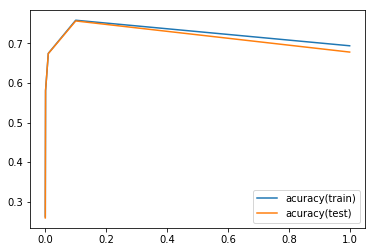

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history['learning_rate'], history["accuracy(train)"], label='acuracy(train)')
plt.plot(history['learning_rate'], history["accuracy(test)"], label='acuracy(test)')

plt.legend()

** subsample **

In [13]:
subsample_list = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

history = []

for subsample in subsample_list:
    model = GradientBoostingClassifier(n_estimators = 30,
                                       subsample = subsample,
                                       random_state = 42)
    
    %time model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    train_score = (y_train_predict == y_train).mean()
    test_score = (y_test_predict == y_test).mean()
    
    print(f"subsample = {subsample}, train = {train_score:.6f}, test = {test_score:.6f}")
    
    history.append({
        'subsample': subsample,
        'accuracy(train)': train_score,
        'accuracy(test)': test_score,
    })
    
history = pd.DataFrame(history)
history

CPU times: user 22.3 s, sys: 302 ms, total: 22.6 s
Wall time: 23.1 s
subsample = 0.1, train = 0.754213, test = 0.750539
CPU times: user 30.5 s, sys: 261 ms, total: 30.8 s
Wall time: 30.8 s
subsample = 0.3, train = 0.756453, test = 0.755656
CPU times: user 39.2 s, sys: 721 ms, total: 40 s
Wall time: 40 s
subsample = 0.5, train = 0.757907, test = 0.757003
CPU times: user 40.6 s, sys: 633 ms, total: 41.2 s
Wall time: 41.3 s
subsample = 0.7, train = 0.757977, test = 0.757972
CPU times: user 38.5 s, sys: 674 ms, total: 39.2 s
Wall time: 39.3 s
subsample = 0.9, train = 0.757677, test = 0.756949
CPU times: user 38.4 s, sys: 548 ms, total: 39 s
Wall time: 39.1 s
subsample = 1.0, train = 0.758808, test = 0.757003


,accuracy(test),accuracy(train),subsample
0,0.750539,0.754213,0.1
1,0.755656,0.756453,0.3
2,0.757003,0.757907,0.5
3,0.757972,0.757977,0.7
4,0.756949,0.757677,0.9
5,0.757003,0.758808,1.0


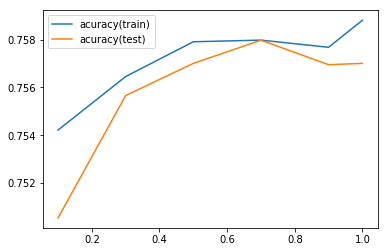

In [ ]:
plt.plot(history['subsample'], history["accuracy(train)"], label='acuracy(train)')
plt.plot(history['subsample'], history["accuracy(test)"], label='acuracy(test)')

plt.legend()

** max_features **

In [ ]:
max_features_list = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

history = []

for max_features in max_features_list:
    model = GradientBoostingClassifier(n_estimators = 30,
                                       max_features = max_features,
                                       random_state = 42)
    
    %time model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    train_score = (y_train_predict == y_train).mean()
    test_score = (y_test_predict == y_test).mean()
    
    print(f"max_features = {max_features}, train = {train_score:.6f}, test = {test_score:.6f}")
    
    history.append({
        'max_features': max_features,
        'accuracy(train)': train_score,
        'accuracy(test)': test_score,
    })
    
history = pd.DataFrame(history)
history

CPU times: user 8.09 s, sys: 546 ms, total: 8.63 s
Wall time: 8.65 s
max_features = 0.1, train = 0.731219, test = 0.729961
CPU times: user 14.7 s, sys: 551 ms, total: 15.3 s
Wall time: 15.3 s
max_features = 0.3, train = 0.752782, test = 0.751562
CPU times: user 21.8 s, sys: 550 ms, total: 22.4 s
Wall time: 22.4 s
max_features = 0.5, train = 0.756499, test = 0.754417
CPU times: user 28.7 s, sys: 550 ms, total: 29.3 s
Wall time: 29.3 s
max_features = 0.7, train = 0.757353, test = 0.755979
CPU times: user 35.3 s, sys: 564 ms, total: 35.9 s
Wall time: 35.9 s
max_features = 0.9, train = 0.758877, test = 0.756949


In [ ]:
plt.plot(history['max_features'], history["accuracy(train)"], label='acuracy(train)')
plt.plot(history['max_features'], history["accuracy(test)"], label='acuracy(test)')

plt.legend()